In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.constraints import maxnorm
from tensorflow.keras.utils import to_categorical


In [2]:
dataset_dir = './_data'

train_ratio = 0.8  # 80% for training, 20% for testing
# Lists to store the file paths and labels
file_paths = []
label_ids = []
labels = ['A', 'B', 'C', 'D', 'E', 'Exceptions']

In [3]:
import tensorflow as tf

devices = tf.config.list_physical_devices("GPU")

if devices:
  print("TensorFlow is running with your GPU")
else:
  print("TensorFlow is not running with your GPU")

TensorFlow is running with your GPU


## Checking if any image is corrupted or not

In [4]:
import os
# Iterate through each class directory
for label_id, label in enumerate(labels):
    class_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(class_dir):
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        file_paths.extend([os.path.join(class_dir, f) for f in image_files])
        label_ids.extend([label_id] * len(image_files))

# Shuffle the file paths and label IDs
tf.random.set_seed(42)
tf.random.shuffle(file_paths)
tf.random.set_seed(42)
tf.random.shuffle(label_ids)

# Split the dataset into training and testing sets using stratified sampling
X_train_paths, X_test_paths, y_train_ids, y_test_ids = train_test_split(file_paths, label_ids, train_size=train_ratio, stratify=label_ids)

# Convert the image data into NumPy arrays
X_train = np.array([img_to_array(load_img(path, target_size=(130, 20))) for path in X_train_paths])
X_test = np.array([img_to_array(load_img(path, target_size=(130, 20))) for path in X_test_paths])

# Normalizing and performing one-hot encoding
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

# Convert the label IDs into one-hot encoded vectors
y_train = to_categorical(y_train_ids, num_classes=len(labels))
y_test = to_categorical(y_test_ids, num_classes=len(labels))

num_classes = y_test.shape[1]
num_classes

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-06-18 13:16:03.734674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-18 13:16:03.734802: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


6

In [5]:
X_train.shape

(7688, 130, 20, 3)

In [6]:
'./_data/Exceptions/Question2-scan0047.jpg' in X_train_paths

True

In [7]:
import keras

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(130,20,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 20, 32)       896       
                                                                 
 dropout (Dropout)           (None, 130, 20, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 130, 20, 32)       9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 65, 10, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 65, 10, 64)        0         
                                                        

In [9]:
model.compile(optimizer='Adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 15))

In [10]:
hist = model.fit(X_train, y_train , epochs=15, validation_split=0.1, callbacks=[lr_scheduler])

Epoch 1/15


2023-06-18 13:16:06.220101: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-18 13:16:06.640410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


217/217 [==============================] - ETA: 0s - loss: 1.5840 - accuracy: 0.3152

2023-06-18 13:16:14.355155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


217/217 [==============================] - 9s 35ms/step - loss: 1.5840 - accuracy: 0.3152 - val_loss: 0.8305 - val_accuracy: 0.7789 - lr: 1.0000e-04
Epoch 2/15
217/217 [==============================] - 7s 33ms/step - loss: 0.4718 - accuracy: 0.8511 - val_loss: 0.3795 - val_accuracy: 0.9064 - lr: 1.1659e-04
Epoch 3/15
217/217 [==============================] - 7s 31ms/step - loss: 0.3071 - accuracy: 0.9049 - val_loss: 0.2902 - val_accuracy: 0.9376 - lr: 1.3594e-04
Epoch 4/15
217/217 [==============================] - 7s 32ms/step - loss: 0.2511 - accuracy: 0.9233 - val_loss: 0.2420 - val_accuracy: 0.9324 - lr: 1.5849e-04
Epoch 5/15
217/217 [==============================] - 7s 32ms/step - loss: 0.2123 - accuracy: 0.9373 - val_loss: 0.2279 - val_accuracy: 0.9467 - lr: 1.8478e-04
Epoch 6/15
217/217 [==============================] - 7s 33ms/step - loss: 0.1980 - accuracy: 0.9418 - val_loss: 0.2153 - val_accuracy: 0.9441 - lr: 2.1544e-04
Epoch 7/15
217/217 [==============================]

## Save Model

In [11]:
models_path = "./saved_models"

os.makedirs(models_path, exist_ok=True)

# get the number of files in the directory
def get_num_files(path):
    if not os.path.exists(path):
        return 0
    return sum([len(files) for r, d, files in os.walk(path)])

# save the model with the current number
num_files = get_num_files(models_path)

model.save(os.path.join(models_path, f"model_{num_files}.h5"))

/var/folders/fp/mn15v0dx2s7_pkffb0939s800000gn/T/ipykernel_63122/3113396048.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


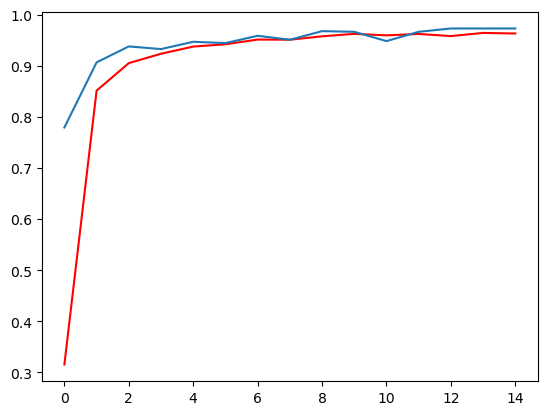

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
fig.show()

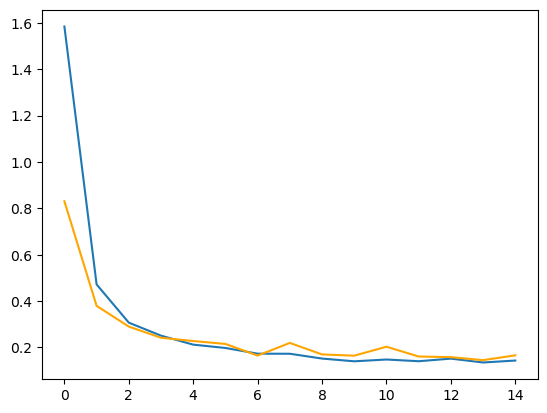

In [13]:
fig
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

In [14]:
predictions = model.predict(X_test)
rounded_predictions = np.apply_along_axis(lambda x: np.round(x), 1, predictions)

17/61 [=======>......................] - ETA: 0s

2023-06-18 13:17:53.528234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - 1s 10ms/step


In [15]:
predictions = tf.argmax(predictions, axis=1)


In [16]:
y_test_argmax = tf.argmax(y_test, axis=1)

In [17]:
cm = tf.math.confusion_matrix(y_test_argmax, predictions)
cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

In [18]:
cm.numpy()

array([[0.98108108, 0.00810811, 0.        , 0.        , 0.00540541,
        0.00540541],
       [0.        , 0.98290598, 0.        , 0.002849  , 0.00569801,
        0.00854701],
       [0.0132626 , 0.00530504, 0.95225464, 0.0132626 , 0.00530504,
        0.01061008],
       [0.00271739, 0.00271739, 0.        , 0.98369565, 0.00271739,
        0.00815217],
       [0.00795756, 0.00265252, 0.        , 0.0132626 , 0.97082228,
        0.00530504],
       [0.05063291, 0.07594937, 0.        , 0.07594937, 0.05063291,
        0.74683544]])

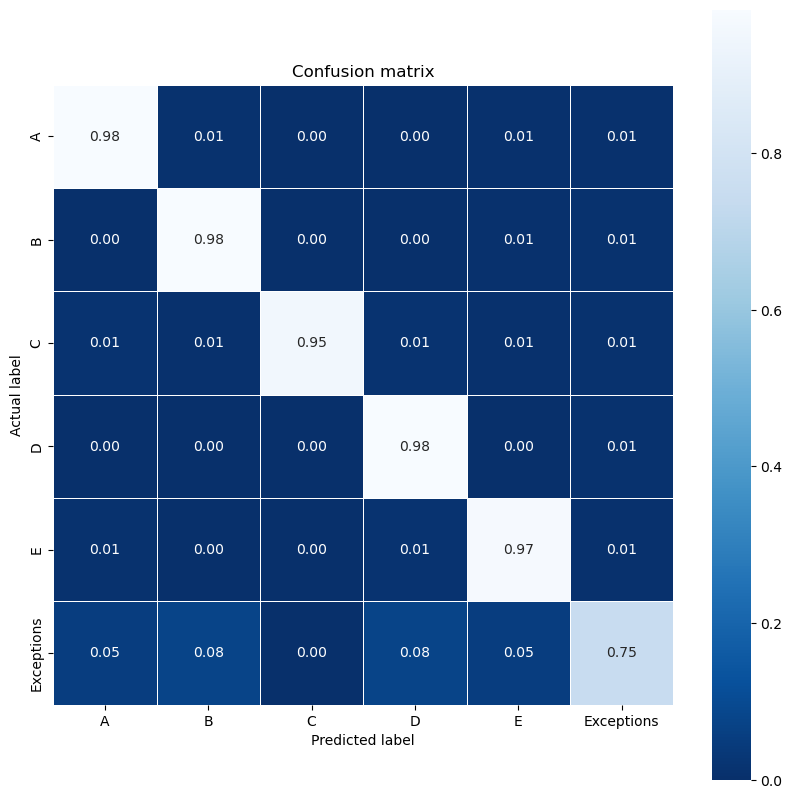

In [19]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square=True, cmap='Blues_r', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion matrix")
plt.show()

In [20]:
from tensorflow.keras.metrics import Precision, Accuracy, Recall, BinaryAccuracy

labels = y_test

precision = Precision()
accuracy = Accuracy()
recall = Recall()

In [21]:
# Evaluate the metrics
precision.update_state(labels, rounded_predictions)
accuracy.update_state(labels, rounded_predictions)
recall.update_state(labels, rounded_predictions)

# Print the metrics
print('Precision:', precision.result().numpy())
print('Accuracy:', accuracy.result().numpy())
print('Recall:', recall.result().numpy())

Precision: 0.97507954
Accuracy: 0.98872703
Recall: 0.95681584


In [22]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.46%


1/1 [==============================] - 0s 78ms/step


array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

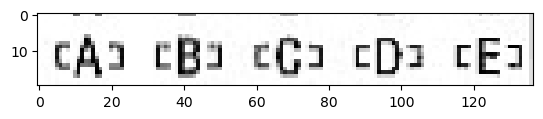

In [23]:
import cv2

a = cv2.imread(dataset_dir + '/Exceptions/Question2-scan0047 - Copy.jpg')
resize = tf.image.resize(a, (130, 20))

b = model.predict(np.expand_dims(resize/255, 0))
plt.imshow(a)
e = np.apply_along_axis(lambda x: np.round(x), 1, b)
e